# Adatok betöltése és szemrevételezése:

In [16]:
import os
import pandas as pd

# Get the current working directory
cwd = os.getcwd()
print("Current working directory:", cwd)
# Load the training and test data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Make sure this path is correct
print('Shape of train:\n')
print(pd_train.shape)
print('Shape of test:\n')
print(pd_test.shape)
print('\nHead of train:\n')
print(pd_train.head())
print('\nHead of test:\n')
print(pd_test.head())
print('\n')


Current working directory: c:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main
Shape of train:

(8440, 6)
Shape of test:

(1000, 5)

Head of train:

   Unnamed: 0     AT      V       AP      RH      PE
0           0  10.54  34.03  1018.71   74.00  478.77
1           1   7.08  39.99  1010.55   91.44  482.83
2           2  14.49  41.16  1000.50   82.17  465.24
3           3  10.73  25.36  1009.35  100.15  469.43
4           4  22.88  63.91  1009.63   87.82  442.50

Head of test:

      AT      V       AP     RH      PE
0   9.59  38.56  1017.01  60.10  481.30
1  12.04  42.34  1019.72  94.67  465.36
2  13.87  45.08  1024.42  81.69  465.48
3  13.72  54.30  1017.89  79.08  467.05
4  15.14  49.64  1023.78  75.00  463.58




# Feature selection és adatok transzformálása:
- **Feature selection:** Előfordulhat hogy PE-t nem az összes válatozó függvényében szeretnénk illesztni. ('AT', 'AP', 'V', 'RH')
    így felkészítjük a kódot a feature selection-re

- **Standardization and Normalization:** Mivel az adatok más nagyságrendbe esnek és ez egyes regressziós modellek illesztésést elvhieti, így az adatokat tarnszformálva előállítjuk a stanardizált és a normlizált adatsort. 
    

In [17]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the training data
pd_train = pd.read_excel(r'C:\basic_projects\AI_kurzus\beadando\01_regression_model\01_main\02_data\filtered_train_data.xlsx')

# Load the test data
pd_test = pd.read_excel(r'02_data/Test.xlsx')  # Update this path

# Selecting the features and target for the training set
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features: Ambient Temperature, Pressure, Vacuum, Humidity
Y_train = pd_train['PE']  # Target: Power Output

# Selecting the features and target for the test set
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Standardizálás
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Teszt adatok skálázása

# Normalizálás
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)  # Teszt adatok skálázása



## Regressziós Modellek és Csoportosítások

### 1. Lineáris regressziós modellek:
- **LinearRegression**: Alap lineáris regressziós modell.
- **RidgeRegression**: L2 regularizációval ellátott Ridge regresszió.

### 2. Legközelebbi szomszéd alapú regressziós modellek:
- **KNeighborsRegressor (5 szomszéd)**: Az 5 legközelebbi szomszéd átlagát használja.
- **KNeighborsRegressor (10 szomszéd)**: Az 10 legközelebbi szomszéd átlagát használja.

### 3. Támogató Vektor Gép alapú regressziós modellek (SVR):
- **SVR (poly kernel)**: Polinomiális kernellel.
- **SVR (rbf kernel)**: Radiális bázisfüggvény (Gaussiánus) kernellel.

### 4. Fa-alapú regressziós modellek:
- **RandomForestRegressor**: Több döntési fa kombinációját használja.
- **DecisionTreeRegressor**: Egyetlen döntési fa modell.
- **BaggingRegressor**: SVR alapmodellként, több példány átlagolásával.

### 5. Neurális hálózat alapú regressziós modellek (MLPRegressor):
- **Multilayer Perceptron 100 RELU ADAM**: 100 rejtett neuronnal, RELU aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 RELU LBFGS**: 100 rejtett neuronnal, RELU aktivációval, LBFGS solverrel.
- **Multilayer Perceptron 100 IDENTITY ADAM**: 100 rejtett neuronnal, IDENTITY aktivációval, ADAM solverrel.
- **Multilayer Perceptron 100 LOGISTIC ADAM**: 100 rejtett neuronnal, LOGISTIC aktivációval, ADAM solverrel.
- **További MLPRegressor variánsok**: 50, 40, és 30 rejtett neuronnal, minden esetben RELU aktivációval és ADAM solverrel.



In [22]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import BaggingRegressor

# Creating the model groups
LR = LinearRegression()
RidgeRegression = Ridge(alpha=1.0)
models_functions= {
    'LinearRegression'  : LR,
    'RidgeRegression'   : RidgeRegression
}

#Nearest Neighbors regressions
n_neighbors = 5
knn_5 = KNeighborsRegressor(n_neighbors)
n_neighbors = 10
knn_10 = KNeighborsRegressor(n_neighbors)
models_nearest_neighbors = {
    '5 Neighbors Regressor'     : knn_5,
    '10 Neighbors Regressor'    : knn_10
}

#Epsilon-Support Vector Regressions
svr_poly_model = SVR(kernel='poly')
svr_rbf_model = SVR(kernel='rbf')
models_support_vector = {
    'support_vector_regression_rbf_model'   : svr_rbf_model,
    'support_vector_regression_poly_model'  : svr_poly_model
}

# Decision Tree Regressions
random_forest = RandomForestRegressor(n_estimators=100)
model_decision_tree_regressor = DecisionTreeRegressor(max_depth=5)
bagging_regressor = BaggingRegressor(estimator=SVR(), n_estimators=10, random_state=0)
models_tree_based_algorithms = {
    'RandomForest'                  : random_forest,
    'model_decision_tree_regressor' : model_decision_tree_regressor,
    'bagging_model'                 : bagging_regressor
}

#Neuaral network Regressions
MultilayerPerceptron_100_relu_adam      = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')
MultilayerPerceptron_100_relu_lbfgs     = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='lbfgs')
MultilayerPerceptron_100_identity_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='identity', solver='adam')
MultilayerPerceptron_100_logistic_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='logistic', solver='adam')
models_neural_network_selection = {
    'Multilayer Perceptron Regressor\n hidden layer = 100, \n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = RELU,\n solver = LBFGS \n': MultilayerPerceptron_100_relu_lbfgs,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = IDENTITY,\n solver = ADAM \n': MultilayerPerceptron_100_identity_adam,
    'Multilayer Perceptron \n hidden layer = 100,\n activation = LOGISTIC,\n solver = ADAM \n': MultilayerPerceptron_100_logistic_adam   
}

MultilayerPerceptron_100_relu_adam  = MLPRegressor(hidden_layer_sizes=(100,), activation='relu', solver='adam')
MultilayerPerceptron_50_relu_adam   = MLPRegressor(hidden_layer_sizes=(50,), activation='relu', solver='adam')
MultilayerPerceptron_40_relu_adam   = MLPRegressor(hidden_layer_sizes=(40,), activation='relu', solver='adam')
MultilayerPerceptron_30_relu_adam   = MLPRegressor(hidden_layer_sizes=(30,), activation='relu', solver='adam')
models_neural_network_layers_100_50_40_30 = {
    'Multilayer Perceptron Regressor\n hidden layer = 100,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_100_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 50,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_50_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 40,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_40_relu_adam,
    'Multilayer Perceptron Regressor\n hidden layer = 30,\n activation = RELU,\n solver = ADAM \n': MultilayerPerceptron_30_relu_adam   
}


# Overall model gruop
model_groups = (models_functions,
                models_nearest_neighbors,
                models_support_vector,
                models_tree_based_algorithms,
                models_neural_network_selection,
                models_neural_network_layers_100_50_40_30)
# Results shpould be stored in the Result dict
results = {}

PE_Actual vs PE_Predicted ploting function: </br>

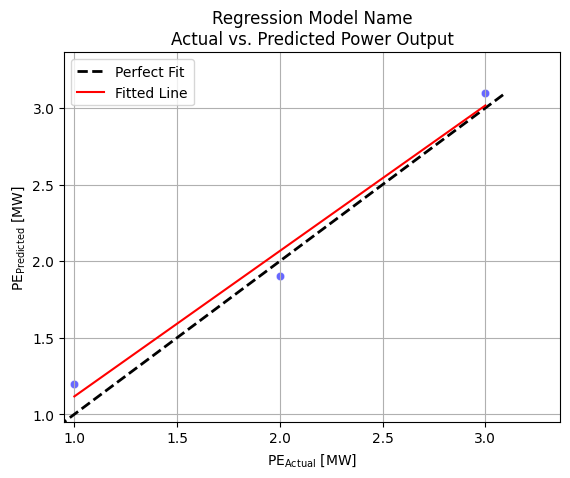

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame for easier plotting with Seaborn
def plot_actual_predicted(Y_test = None, Y_pred = None, model_name = None):
    if Y_test is None or Y_pred is None or model_name is None:
        print('MISSING DATA!')
    else:
        data = pd.DataFrame({
            'Actual': Y_test,
            'Predicted': Y_pred
        })
        ax = sns.scatterplot(x='Actual', y='Predicted', data=data, color='blue', alpha=0.6)

        # Min/Max value for plotting the perfect fit line
        max_value = max(data['Actual'].max(), data['Predicted'].max())
        min_value = min(data['Actual'].min(), data['Predicted'].min())

        # Perfect fit line (where predicted equals actual)
        plt.plot([0, max_value], [0, max_value], 'k--', lw=2, label='Perfect Fit')  # Black dashed line

        # Calculate the trend line (linear fit) to represent the fitted line
        z = np.polyfit(data['Actual'], data['Predicted'], 1)
        p = np.poly1d(z)
        plt.plot(data['Actual'], p(data['Actual']), "r-", label='Fitted Line')  # Red solid line

        ax.set(xlabel=r'PE$_{\text{Actual}}$ [MW]',  # Subscript for 'Actual'
            ylabel=r'PE$_{\text{Predicted}}$ [MW]',  # Subscript for 'Predicted'
            title=f'{model_name}\nActual vs. Predicted Power Output')

        ax.set_xlim(min_value*0.95, max_value*1.085)
        ax.set_ylim(min_value*0.95, max_value*1.085)
        plt.legend()
        plt.grid(True)
        plt.show()
        
Y_test_example = [1,2,3]
Y_pred_example = [1.2,1.9,3.1]
model_name_example = 'Regression Model Name'
plot_actual_predicted(Y_test_example , Y_pred_example, model_name_example)   


## Modelek pontozása: 
- Minden mindolet kvatitatív számok alapján szeretnénk lemérni és összeshaonlítani.
-  Ehhez **keresztvalidációt** fogunk alakalmazni: </br>
   * Ez egy technika, amely segít megállapítani, hogy a modell mennyire jól generalizál új adatokra. 
   * A **keresztvalidáció** során az adatokat több kisebb csoportra osztjuk, és minden egyes csoportra illesztjük a modellt, miközben a többi csoport adatát tesztelésre használjuk. 
   * Ezt többször megismételve a modell teljesítményének átlaga jobb képet adhat a modell valós teljesítményéről.
</br>

 A következő **model_fiting_prediction_evaluation(model, X_train_scaled, X_test_scaled, Y_train, Y_test)** függvény pontosan ezt csinálja. 

In [23]:
from sklearn.model_selection import cross_val_score, KFold

# Keresztvalidációs konfiguráció
kf = KFold(n_splits=3, shuffle=True, random_state=42)
def model_fiting_prediction_evaluation(model, X_train_scaled, X_test_scaled, Y_train, Y_test): 
    # Model fiting
    model.fit(X_train_scaled, Y_train)
    # Makeing prediction
    Y_pred = model.predict(X_test_scaled)
    # Evaluating the model
    mse = mean_squared_error(Y_test, Y_pred)
    r2 = model.score(X_test_scaled, Y_test)
    
    cv_results = cross_val_score(model, X_test_scaled,Y_test, cv=kf, scoring='neg_mean_squared_error')
    return model, Y_pred, mse, r2, cv_results

## Erdemények ábrázolása: 
### PE mért vs PE perdictált: 
* Tegyük fel, hogy minden modelt sikerült illeszteni és ez után a képesek vagyunk jódolni (predikálni) adatokat (PE perdicált).

* Ideális esetben a PE mérési adatok függvényében ábrázolva a PE predikált adatokat egy olyan egyenest kapun aminke a meredksége 1 és eltolása 0. 

A következő **plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None)**  függvény pontosan egy ilyen ábrát fog gyártani ( egyelőre csak egy példa adatsoron): 
* PE predikált és PE mért adatpontokat kirajzolja
* Elmélti egyenes berajzolása egy szaggatott vonallal 
* Továbbá egy egyenest is illeszt az adatpontokra és az ábráról leolvasható az illesztett egynes paraméteri

Equation of the fitted line: y = 0.95x + 0.17


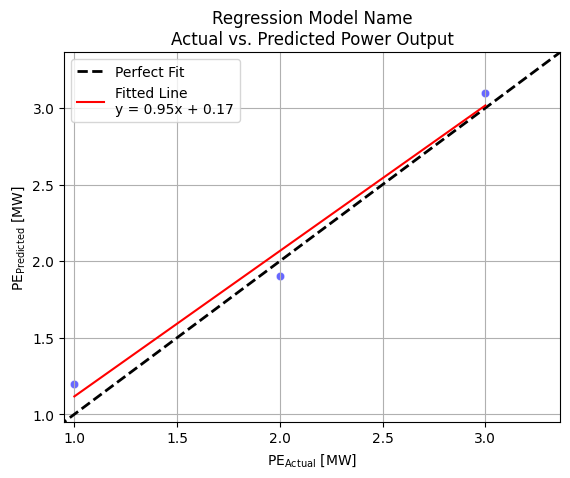

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from colorama import Fore, Back, Style

def plot_actual_predicted(Y_test=None, Y_pred=None, model_name=None):
    if Y_test is None or Y_pred is None or model_name is None:
        print('MISSING DATA!')
    else:
        data = pd.DataFrame({
            'Actual': Y_test,
            'Predicted': Y_pred
        })

        ax = sns.scatterplot(x='Actual', y='Predicted', data=data, color='blue', alpha=0.6)

        # Min/Max value for plotting the perfect fit line
        max_value = max(data['Actual'].max(), data['Predicted'].max())
        min_value = min(data['Actual'].min(), data['Predicted'].min())

        # Perfect fit line (where predicted equals actual)
        plt.plot([0, max_value*1.2], [0, max_value*1.2], 'k--', lw=2, label='Perfect Fit')  # Black dashed line

        # Calculate the trend line (linear fit) to represent the fitted line
        slope, intercept = np.polyfit(data['Actual'], data['Predicted'], 1)
        line = np.poly1d([slope, intercept])
        x_line = data['Actual']
        y_line = line(data['Actual'])
        line_label = f"Fitted Line \ny = {slope:.2f}x + {intercept:.2f}"
        plt.plot(x_line, y_line, "r-", label = line_label)  # Red solid line

        # Display the equation of the line
        print(f"Equation of the fitted line: y = {slope:.2f}x + {intercept:.2f}")

        ax.set(xlabel=r'PE$_{\text{Actual}}$ [MW]',  # Subscript for 'Actual'
               ylabel=r'PE$_{\text{Predicted}}$ [MW]',  # Subscript for 'Predicted'
               title=f'{model_name}\nActual vs. Predicted Power Output')

        ax.set_xlim(min_value*0.95, max_value*1.085)
        ax.set_ylim(min_value*0.95, max_value*1.085)
        plt.legend()
        plt.grid(True)
        plt.show()

# Example usage
Y_test_example = [1, 2, 3]
Y_pred_example = [1.2, 1.9, 3.1]
model_name_example = 'Regression Model Name'
plot_actual_predicted(Y_test_example, Y_pred_example, model_name_example)



Fitting and evaluating LinearRegression

Mean Squared Error: 18.603111749333046
R-squared Score: 0.9323494943464284
Cross-Validation Score: [-19.77996106 -17.2933761  -18.92846063]
Coefficients: [-14.61944324   0.40583434  -3.038816    -2.2932211 ]
Intercept: 454.3101327014219
LinearRegression CV MSE: 18.667265930460875
Equation of the fitted line: y = 0.94x + 28.01


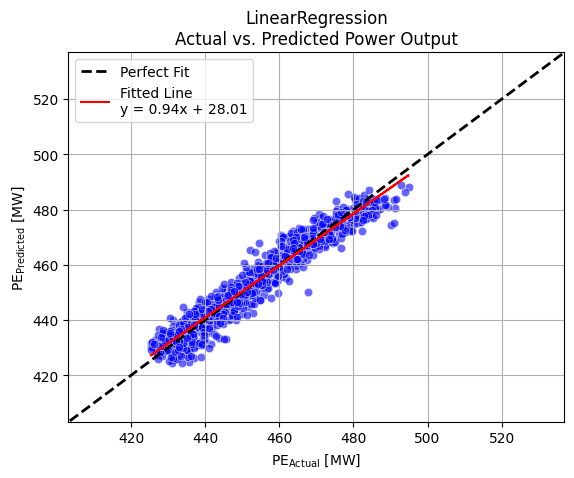


Fitting and evaluating RidgeRegression

Mean Squared Error: 18.603730462225617
R-squared Score: 0.932347244387357
Cross-Validation Score: [-19.76832355 -17.30035293 -18.9349356 ]
Coefficients: [-14.61022104   0.40781599  -3.044368    -2.2898856 ]
Intercept: 454.3101327014219
RidgeRegression CV MSE: 18.66787069122631
Equation of the fitted line: y = 0.94x + 28.05


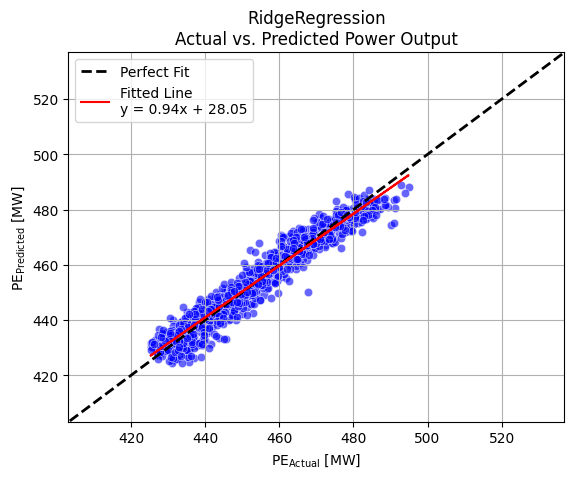


Fitting and evaluating 5 Neighbors Regressor

Mean Squared Error: 12.332689856000012
R-squared Score: 0.9551519812346994
Cross-Validation Score: [-21.15237669 -23.62528136 -18.91501889]
5 Neighbors Regressor CV MSE: 21.230892315620995
Equation of the fitted line: y = 0.96x + 19.61


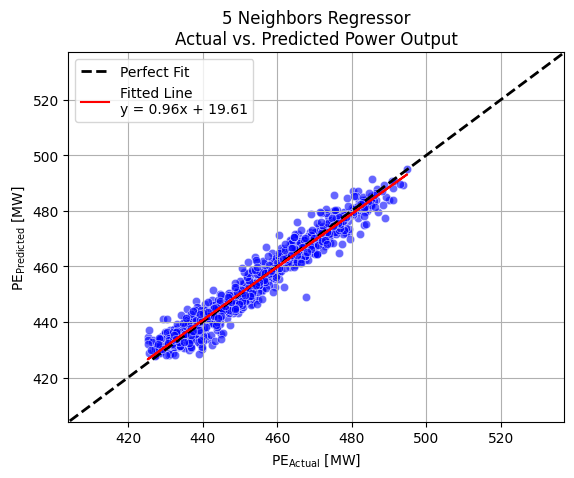


Fitting and evaluating 10 Neighbors Regressor

Mean Squared Error: 13.351378744000002
R-squared Score: 0.9514475032255649
Cross-Validation Score: [-20.42329178 -22.68651607 -19.13955127]
10 Neighbors Regressor CV MSE: 20.749786374593146
Equation of the fitted line: y = 0.95x + 23.26


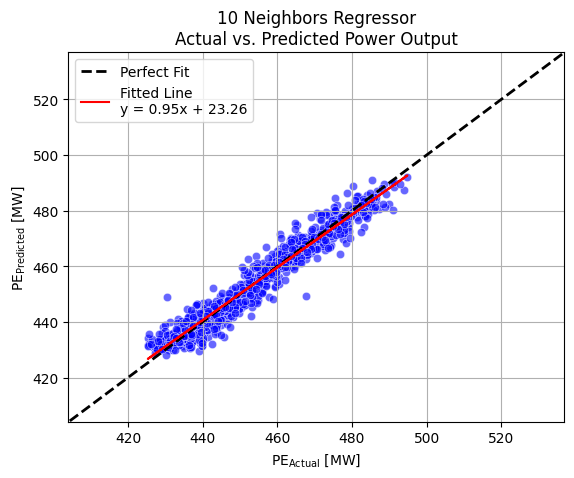


Fitting and evaluating support_vector_regression_rbf_model

Mean Squared Error: 16.07078447368031
R-squared Score: 0.9415583419299184
Cross-Validation Score: [-24.20628008 -24.72898357 -25.53381399]
Intercept: [456.19184652]
support_vector_regression_rbf_model CV MSE: 24.823025879987004
Equation of the fitted line: y = 0.95x + 23.59


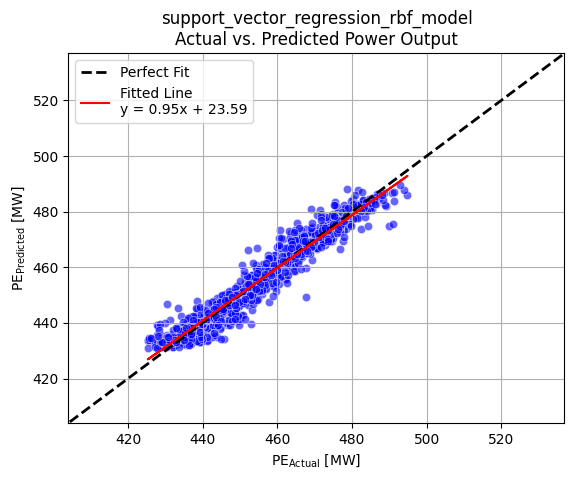


Fitting and evaluating support_vector_regression_poly_model

Mean Squared Error: 62.05129263323112
R-squared Score: 0.7743495077781101
Cross-Validation Score: [-64.86591574 -55.85363892 -78.72919867]
Intercept: [453.66861986]
support_vector_regression_poly_model CV MSE: 66.48291777732045
Equation of the fitted line: y = 0.87x + 59.91


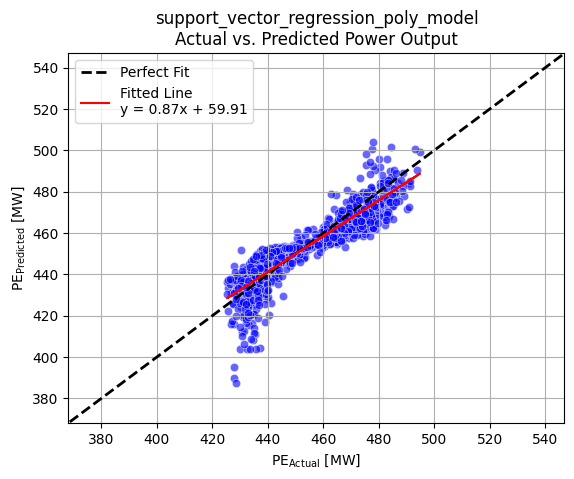


Fitting and evaluating RandomForest

Mean Squared Error: 9.156170835809958
R-squared Score: 0.9667034421316512
Cross-Validation Score: [-17.09738748 -17.54903901 -17.0804052 ]
RandomForest CV MSE: 17.24227722821281
Equation of the fitted line: y = 0.96x + 18.21


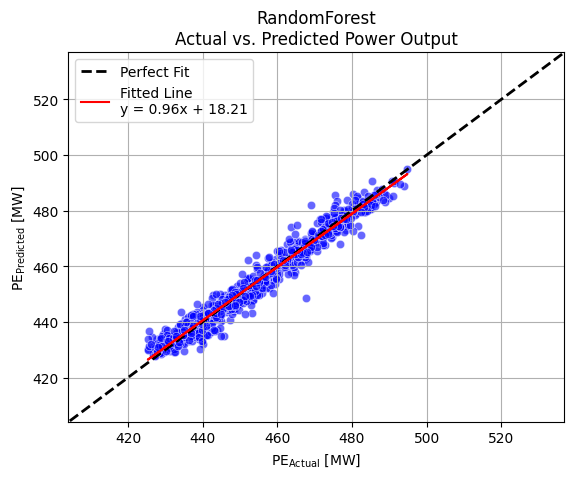


Fitting and evaluating model_decision_tree_regressor

Mean Squared Error: 17.750336791696363
R-squared Score: 0.9354506237633871
Cross-Validation Score: [-22.13192454 -24.70760247 -19.48984485]
model_decision_tree_regressor CV MSE: 22.109790619022036
Equation of the fitted line: y = 0.94x + 29.04


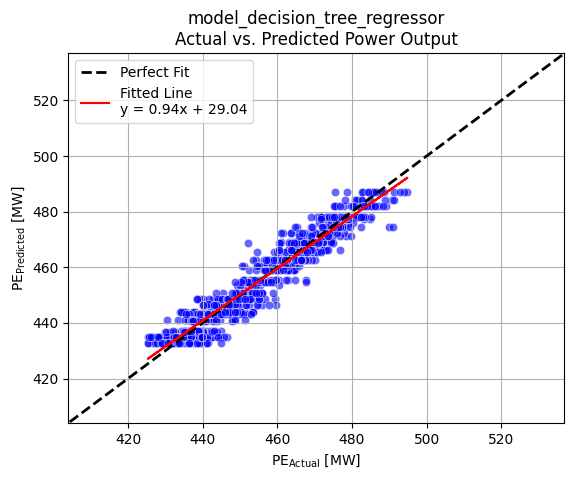


Fitting and evaluating bagging_model

Mean Squared Error: 16.02097055450524
R-squared Score: 0.9417394910229404
Cross-Validation Score: [-24.0737885  -26.01321329 -25.78127424]
bagging_model CV MSE: 25.28942534729987
Equation of the fitted line: y = 0.95x + 23.65


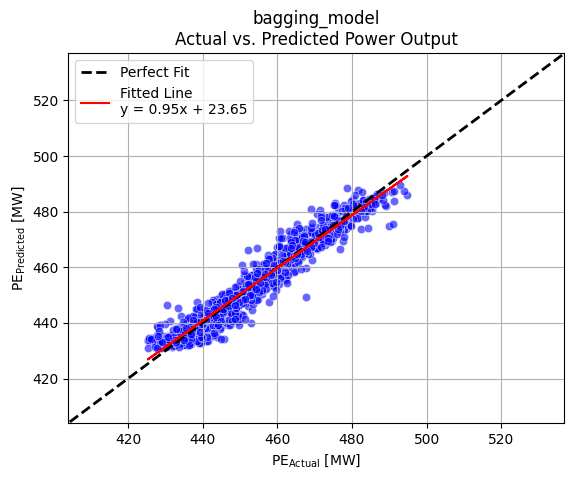


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 100, 
 activation = RELU,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 19.844981636478252
R-squared Score: 0.9278334151574547
Cross-Validation Score: [-78454.08440969 -73056.81958259 -80567.10730269]
Multilayer Perceptron Regressor
 hidden layer = 100, 
 activation = RELU,
 solver = ADAM 
 CV MSE: 77359.33709832678
Equation of the fitted line: y = 0.93x + 30.56


C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


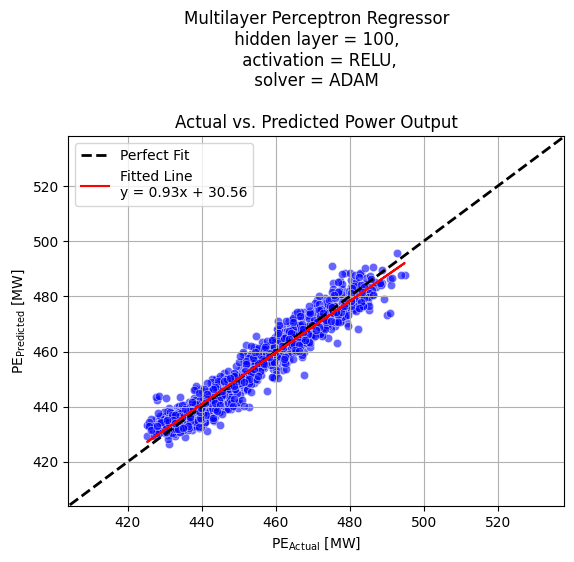


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = RELU,
 solver = LBFGS 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:

Mean Squared Error: 15.523137736545651
R-squared Score: 0.9435498678200973
Cross-Validation Score: [-16.38623356 -15.97706903 -16.18203835]
Multilayer Perceptron 
 hidden layer = 100,
 activation = RELU,
 solver = LBFGS 
 CV MSE: 16.18178031169595
Equation of the fitted line: y = 0.94x + 26.20


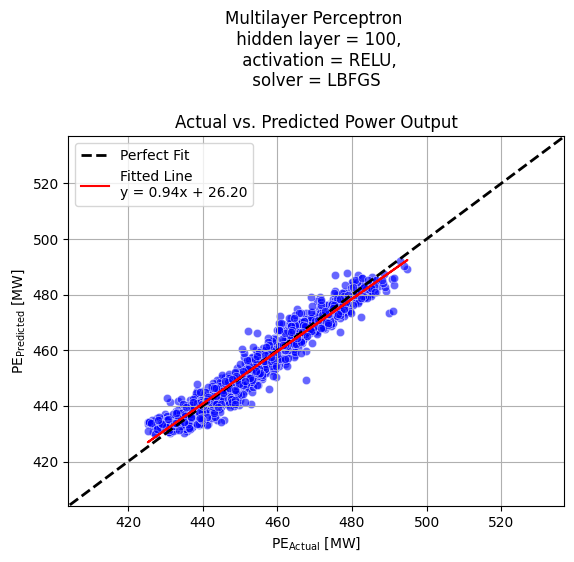


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = IDENTITY,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 18.591749769853347
R-squared Score: 0.9323908123617898
Cross-Validation Score: [ -98984.23142574  -99987.79988401 -103030.06568196]
Multilayer Perceptron 
 hidden layer = 100,
 activation = IDENTITY,
 solver = ADAM 
 CV MSE: 100667.36566390109
Equation of the fitted line: y = 0.93x + 29.72


C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


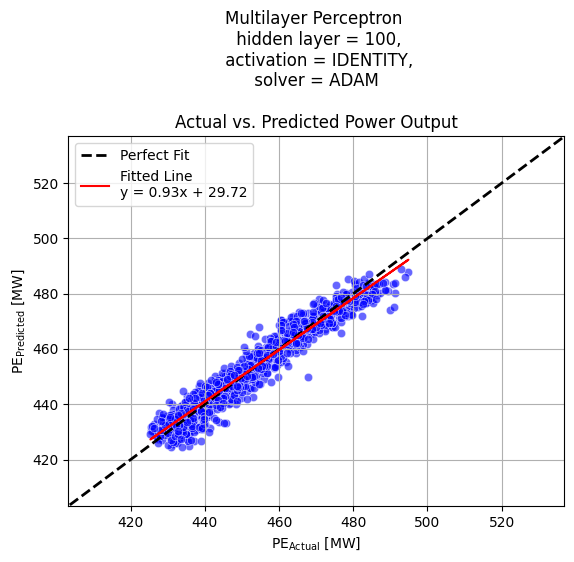


Fitting and evaluating Multilayer Perceptron 
 hidden layer = 100,
 activation = LOGISTIC,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 80.99022317849938
R-squared Score: 0.7054777918421349
Cross-Validation Score: [-151426.35963735 -151257.47788027 -151575.35489779]
Multilayer Perceptron 
 hidden layer = 100,
 activation = LOGISTIC,
 solver = ADAM 
 CV MSE: 151419.73080513792
Equation of the fitted line: y = 0.65x + 160.64


C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


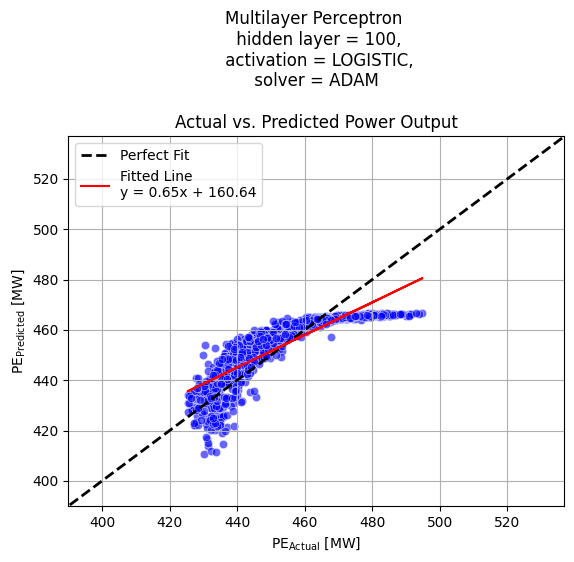


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 100,
 activation = RELU,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 17.2409124484535
R-squared Score: 0.9373031533227955
Cross-Validation Score: [-80720.0961592  -77051.50258254 -81063.10983025]
Multilayer Perceptron Regressor
 hidden layer = 100,
 activation = RELU,
 solver = ADAM 
 CV MSE: 79611.56952399797
Equation of the fitted line: y = 0.94x + 27.39


C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


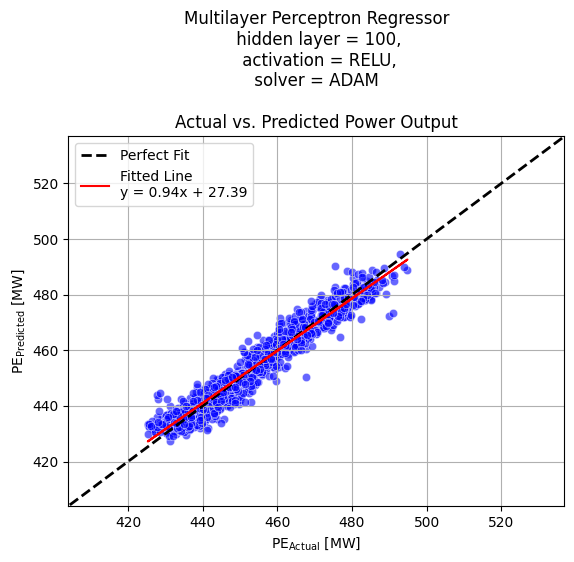


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 50,
 activation = RELU,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Mean Squared Error: 27.023651522498877
R-squared Score: 0.9017280702961696
Cross-Validation Score: [-132105.65511194 -127918.12335894 -129418.44627918]
Multilayer Perceptron Regressor
 hidden layer = 50,
 activation = RELU,
 solver = ADAM 
 CV MSE: 129814.07491668465
Equation of the fitted line: y = 0.92x + 34.72


C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


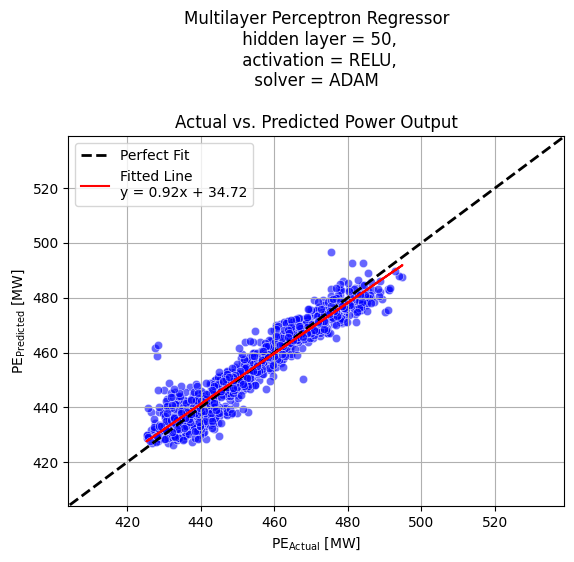


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 40,
 activation = RELU,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Mean Squared Error: 29.31446147332653
R-squared Score: 0.8933975042264753
Cross-Validation Score: [-152200.27261197 -143136.63911623 -137077.65365183]
Multilayer Perceptron Regressor
 hidden layer = 40,
 activation = RELU,
 solver = ADAM 
 CV MSE: 144138.18846000897
Equation of the fitted line: y = 0.93x + 33.49


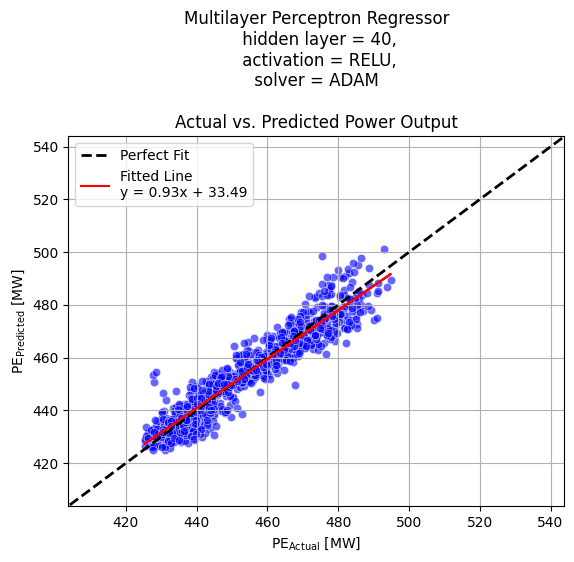


Fitting and evaluating Multilayer Perceptron Regressor
 hidden layer = 30,
 activation = RELU,
 solver = ADAM 




C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\Users\Szilágyi Gergő\AppData\Roaming\Python\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization

Mean Squared Error: 73.42897545641947
R-squared Score: 0.7329743869635914
Cross-Validation Score: [-160554.79493358 -166086.32692545 -159716.61863812]
Multilayer Perceptron Regressor
 hidden layer = 30,
 activation = RELU,
 solver = ADAM 
 CV MSE: 162119.2468323816
Equation of the fitted line: y = 0.94x + 27.73


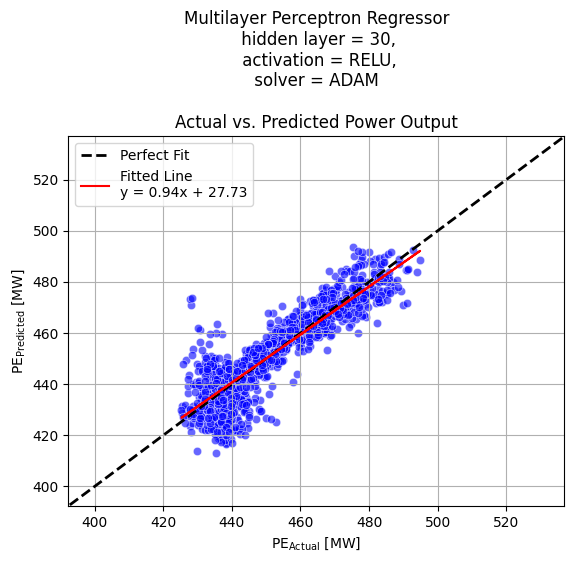

In [26]:
from colorama import Fore, Back, Style

# Fitting models and making predictions
for model_group in model_groups:
    for model_name, model in model_group.items():
        # Print Model Name
        print('\n' + 'Fitting and evaluating ' + Fore.YELLOW + f"{model_name}")
        print(Style.RESET_ALL)
        
        # Model fiting, makeing prediction, evaluating the model
        model, Y_pred, mse, r2, cv_results = model_fiting_prediction_evaluation(model, 
                                           X_train_scaled, 
                                           X_test_scaled, 
                                           Y_train, 
                                           Y_test)
        # Print MSE, R2 and  Coefficients, Intercept
        print(f"Mean Squared Error: {mse}\nR-squared Score: {r2}\nCross-Validation Score: {cv_results}")
        
        model_coef_exist = False
        if hasattr(model, 'coef_'):
            print(f"Coefficients: {model.coef_}")
            model_coef_exist = True 
        model_intercept_exist = False
        if hasattr(model, 'intercept_'):
            model_intercept_exist = True
            print(f"Intercept: {model.intercept_}")
        
        # Collect results
        results[model_name] = {
            "MSE"           : mse,
            "R2"            : r2,
            "cv_results"    : cv_results
        }

        print(f'{model_name} CV MSE: {-cv_results.mean()}')  # Negatív MSE átlagát pozitívvá tesszük
        # Plot PE_Actual vs PE_Predicted 
        plot_actual_predicted(Y_test, Y_pred,model_name)


## Innetől csak skiccek vannak... nem fontos, nem része az analízisnek! 

(12) Bagging REP Tree (BREP):</br>


In [1]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
import numpy as np

# Adatok és modell példányok
X, y = np.array([[1, 2], [3, 4], [5, 6], [7, 8]]), np.array([1, 2, 3, 4])  # Példa adatok
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Support Vector Regression': SVR()
}

# Keresztvalidációs konfiguráció
kf = KFold(n_splits=3, shuffle=True, random_state=42)

# Keresztvalidáció minden modellen
for name, model in models.items():
    cv_results = cross_val_score(model, X, y, cv=kf, scoring='neg_mean_squared_error')
    print(f'{name} CV MSE: {-cv_results.mean()}')  # Negatív MSE átlagát pozitívvá tesszük


Linear Regression CV MSE: 6.573840876841765e-32
Decision Tree CV MSE: 1.0
Support Vector Regression CV MSE: 1.4965100374059315


In [12]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Selecting the features and target for both training and test sets
X_train = pd_train[['AT', 'AP', 'V', 'RH']]  # Features
Y_train = pd_train['PE']  # Target
X_test = pd_test[['AT', 'AP', 'V', 'RH']]  # Ensure the same features as the training set
Y_test = pd_test['PE']

# Standardization
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Teszt adatok skálázása

# Normalization
min_max_scaler = MinMaxScaler()
X_train_normalized = min_max_scaler.fit_transform(X_train)
X_test_normalized = min_max_scaler.transform(X_test)  # Teszt adatok skálázása


In [ ]:

# Creating the linear regression model
model = LinearRegression()

# Fitting the model to the training data
model.fit(X_train, Y_train)

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = model.score(X_test, Y_test)  # Directly using the model's score method to compute R-squared

# Printing the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Power Output (MW)')
plt.ylabel('Predicted Power Output (MW)')
plt.title('Actual vs. Predicted Power Output')
plt.show()


# Fitting the model to the training data
model.fit(X_train_scaled, Y_train)

# Making predictions on the test set
Y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(Y_test, Y_pred)
r2 = model.score(X_test_scaled, Y_test)  # Directly using the model's score method to compute R-squared

# Printing the results
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)
print("Mean Squared Error:", mse)
print("R-squared Score:", r2)

# Plotting actual vs predicted values
plt.scatter(Y_test, Y_pred, color='blue')
plt.xlabel('Actual Power Output (MW)')
plt.ylabel('Predicted Power Output (MW)')
plt.title('Actual vs. Predicted Power Output')
plt.show()